# Sampling Distributions and Central Limit Theorem #

In this notebook, we will learn about:

- Sampling Distributions for both mean and median
- The Central Limit Theorem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datascience import *

import scipy.stats

from hide_code3 import hide_code

hide_code()

## Variation in Samples ##

If you have a large population, it's very likely that everytime you draw a sample, it will be a different sample.


Then if you compute a statistics from that sample (mean, median, standard deviation, etc), it could be slightly different from sample to sample.  

Run and re-run the next few cells to see what I mean.


In [2]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [3]:
x = united.sample(100).column('Delay')
x

array([ 17,  80,  -6,  11,  28,  40,  -4,  72,  -4,  49,  38,  28,  20,
        14,   0,  -3,  -2,  -4,  -3,  -2,  -2,  22,  30,  -3,  -2,   1,
         1,  -8,   1,  49,  -3,  -2,  -3,   8,   2,  16,   3,   2,   5,
         0,  48,  -2,   3,   1,  -4,   2,  52,   7,  -1,  81,   0,  -4,
         0,  48,   6,  19,   4,   2,  31,  -1,  63,  -2,  39,  15,   3,
        -6,  -2,  -2,  13,   0,   2,  12,   0,  -5,   2,  -8,   2,   5,
        59,  32,  15,   8,  28,  -9,  13,  -1,   4,  -3,   0,  -1, 120,
        -1,  56,  -2,   0,  89,   0,   3,  42,   1])

In [4]:
np.mean(x)

13.62

In [5]:
np.mean(united.sample(100).column('Delay'))

17.94

## Sampling Distribution ##

For a fixed population and fixed sample size, and for a particular statistic (most often the mean), the collection of all possible values of that statistic over all possible samples of that size, forms what we call the sampling distribution.

The graphs below show a fixed population and (partial) sampling distributions for various sample sizes. 

### Uniform Population ###

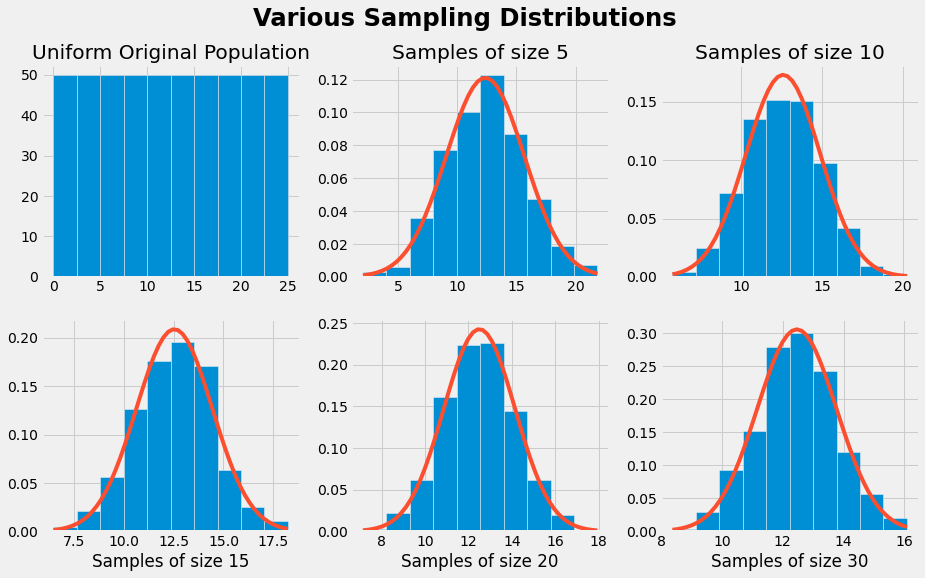

In [6]:
from hidden_demos import sampling_distribution_demo1
sampling_distribution_demo1()



### Symmetric but non-uniform population ###

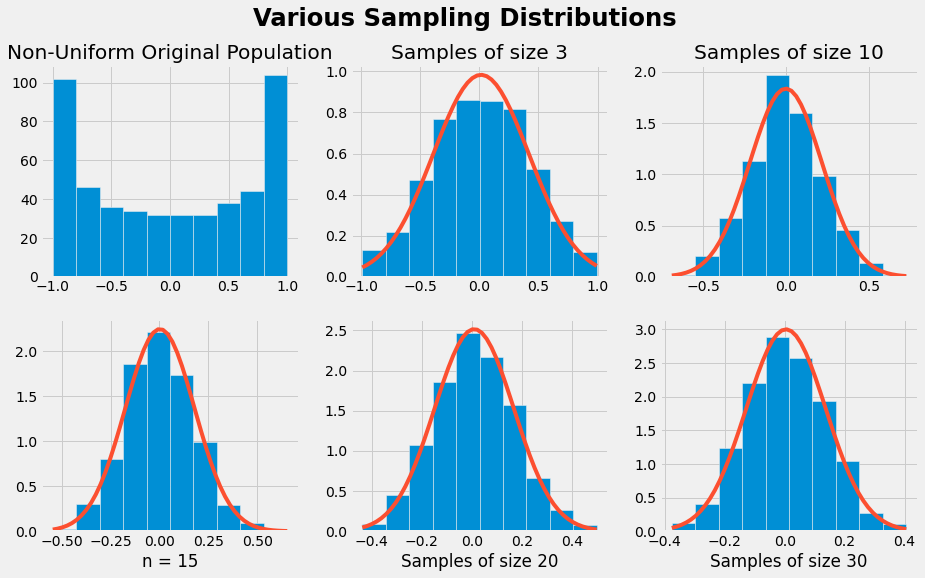

In [7]:
from hidden_demos import sampling_distribution_demo2

sampling_distribution_demo2()

### Non-symmetric population ###

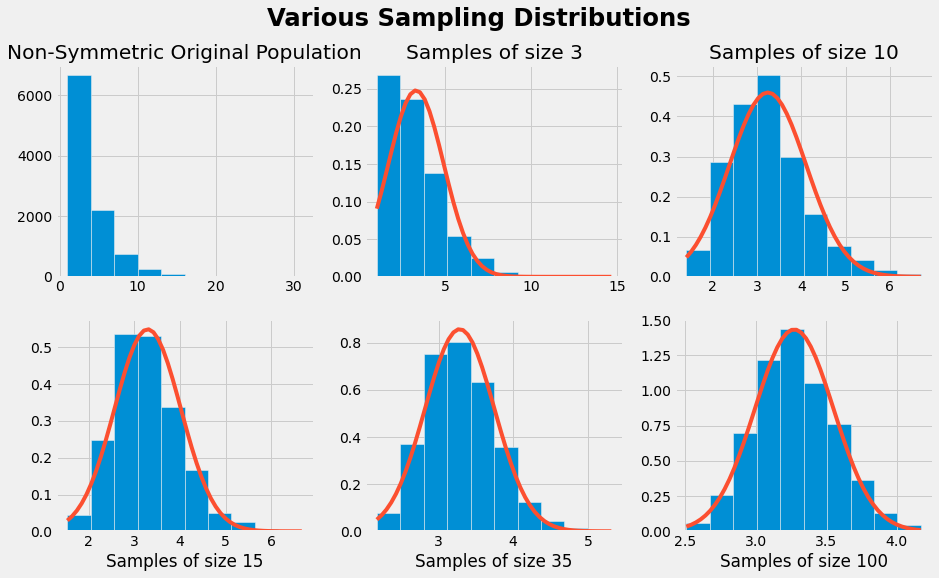

In [8]:
from hidden_demos import sampling_distribution_demo3

sampling_distribution_demo3()

### Normal population ###

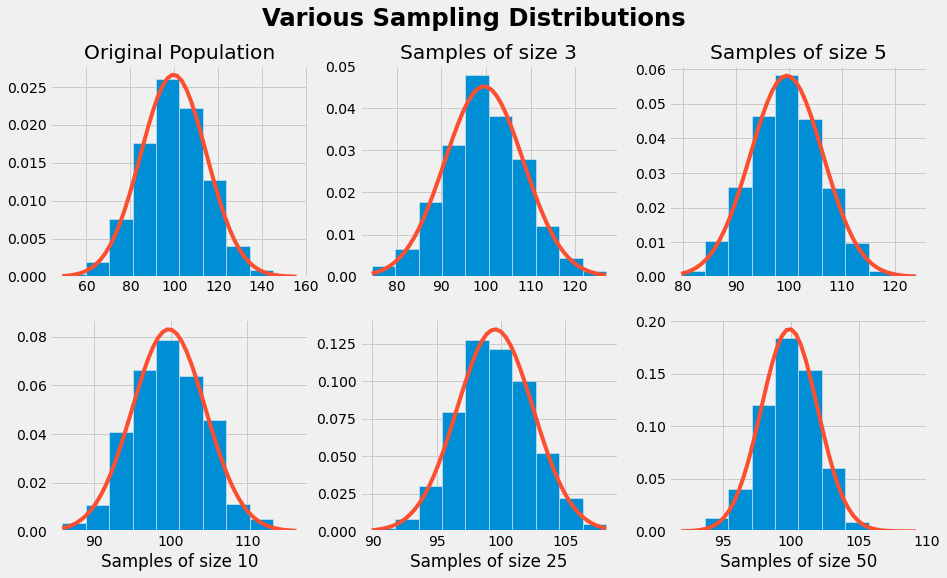

In [9]:
from hidden_demos import sampling_distribution_demo4

sampling_distribution_demo4()

## What were we supposed to observe in these graphs above? ##

1. As the sample size increased, all the sampling distributions began to approach normal distributions.  Did you notice the normal curve superimposed on most graphs?

2. For the example where the population was normal to start with, the sampling distribution *always* looked normal.

3. Did you notice that the scaling on the x-axis kept changing?  Go back and look again.

    As the sample size *increased* the spread along the x-axis *decreased*.  That's not just a coincidence or a trick.  The standard deviations are shrinking as the sample size increases, and there's even a formula that predicts what the sampling distributions standard deviation should be.  



### Law of Large Numbers ###

If $\overline{X}_n$ is the average of $n$ many $x_i$ all drawn from the same population/distribution with mean $\mu$ then as $n$ increases, $\overline{X}_n$ will approach $\mu$.  

That is, when your sample size is very large, you can have some confidence that the sample average is "pretty close" to the population average.  Later, when we study confidence intervals, we'll be able to quantify what counts as "pretty close".


### Central Limit Theorem ###

Assume $\overline{X}_n$ is the average of $n$ many $x_i$ all drawn from the same population/distribution with mean $\mu$ and population standard deviation $\sigma$.  Then $\overline{X}_n$ is a member of a sampling distribution.  For large values of $n$, this sampling distribution can be assumed approximately normal.  Specifically, the sampling distribution can be assumed to be $\displaystyle N\left(\mu, \frac{\sigma}{\sqrt{n}} \right)$.  

*Recall N(m, s) refers to a normal distribution with a mean of m and a standard deviation of s.*

What counts as a large sample size?  Generally, above 32 is considered large enough that most sampling distributions are at least approximately normal.  We saw with our Non-Symmetric Original Population example that sometimes it can take much larger samples before the graph appears normal; fortunately, such strongly skewed original populations don't come up often, and when they do, it's easy to detect.  


### Normal populations don't need CLT ###

If the original population is already normal, the sampling distribution for literally any size will automatically be normal and will follow $\displaystyle N\left(\mu, \frac{\sigma}{\sqrt{n}} \right)$.  




## Large Random Samples ##

In [10]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


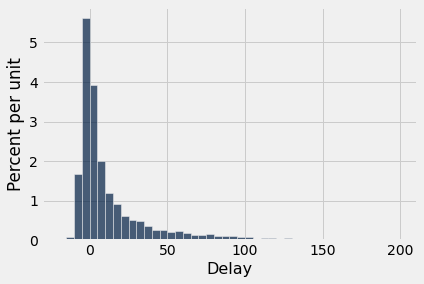

In [11]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

In [12]:
np.average(united.column('Delay'))

16.658155515370705

In [13]:
np.average(united.sample(10).column('Delay'))

10.4

In [14]:
def sample_mean(size):
    return np.average(united.sample(size).column('Delay'))

16.8086


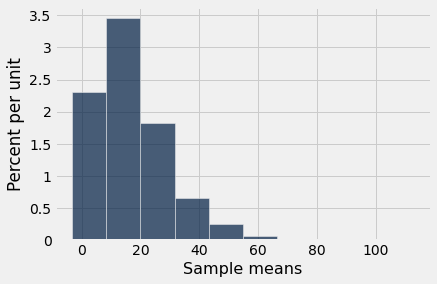

In [15]:
sample_means = make_array()

for i in np.arange(1000):
    new_mean = sample_mean(10)
    sample_means = np.append(sample_means, new_mean)

print(np.average(sample_means))

Table().with_column('Sample means', sample_means).hist()

17.10984


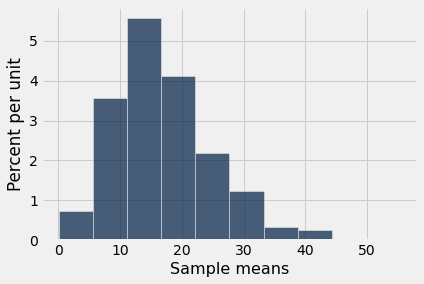

In [16]:
sam_size = 25

sample_means = make_array()

for i in np.arange(1000):
    new_mean = sample_mean(sam_size)
    sample_means = np.append(sample_means, new_mean)
    
print(np.average(sample_means))
    
Table().with_column('Sample means', sample_means).hist()

16.628220000000002


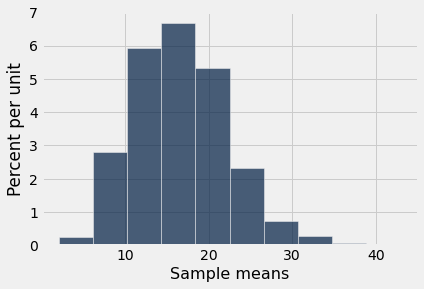

In [17]:
sam_size = 50

sample_means = make_array()

for i in np.arange(1000):
    new_mean = sample_mean(sam_size)
    sample_means = np.append(sample_means, new_mean)
    
print(np.average(sample_means))
    
Table().with_column('Sample means', sample_means).hist()

16.689342


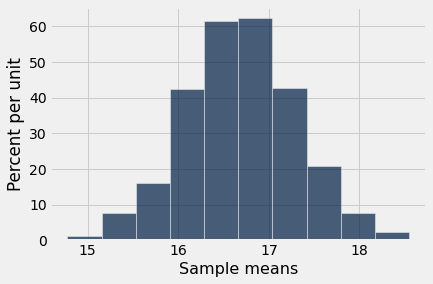

In [18]:
sam_size = 4000

sample_means = make_array()

for i in np.arange(1000):
    new_mean = sample_mean(sam_size)
    sample_means = np.append(sample_means, new_mean)
    
print(np.average(sample_means))
    
Table().with_column('Sample means', sample_means).hist()

## Sampling Distributions with Medians ##

A sampling distribution exists (in theory) for any statistic you can compute from a sample.  Another common statistic to work with is the median.  

It's not a common to work with the median, and it doesn't work out as nicely, because the Central Limit Theorem does not necessarily apply to the median, like it does with the mean.


In [19]:
np.median(united.column('Delay'))

2.0

In [20]:
np.median(united.sample(10).column('Delay'))

2.0

In [21]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [22]:
sample_median(10)

0.0

In [23]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

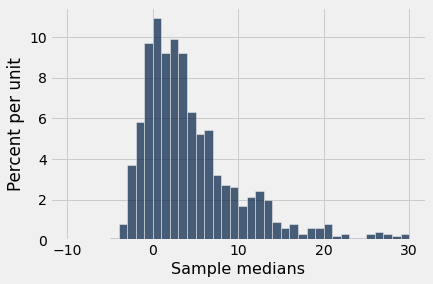

In [24]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

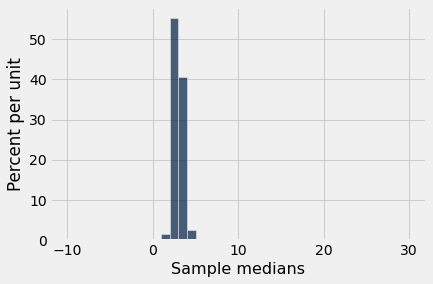

In [25]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)


Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

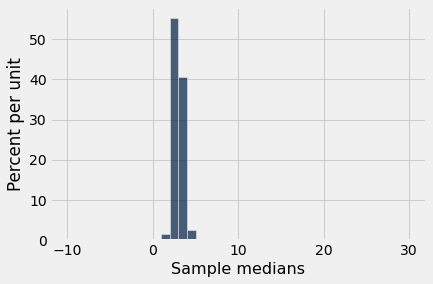

In [26]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))